## Treo Analysis

In [1]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:

# Load the dataset
df = pd.read_csv("dataset_manual.csv", sep=";")


In [4]:
# Rename columns
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# Replace "Ma" with "M" in the "Forsanger_koen" column
df['Forsanger_koen'] = df['Forsanger_koen'].str.replace("Ma", "M")

In [6]:
# Filter out rows with missing or empty values in "Forsanger_koen"
df_filtered = df[(~df['Forsanger_koen'].isna()) & (df['Forsanger_koen'] != "")]

/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/3113321751.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/3113321751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)


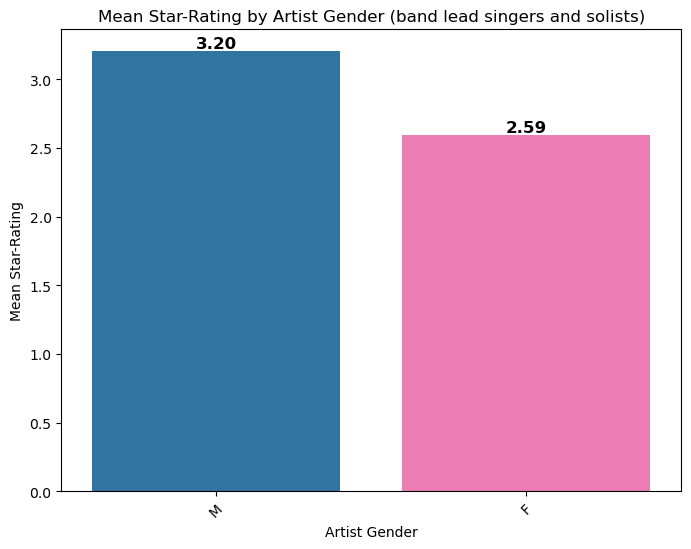

In [7]:
# Plot average value of the column "Stjerner" grouped on "Forsanger_koen"
plt.figure(figsize=(8, 6))
custom_palette = ["#1f77b4", "#FF69B4"]
ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
plt.xlabel('Artist Gender')
plt.ylabel('Mean Star-Rating')
plt.title('Mean Star-Rating by Artist Gender (band lead singers and solists)')
plt.xticks(rotation=45)

# Add mean values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black', weight='bold')

plt.show()


In [8]:
# Filter rows where Solist is 1
df_filtered_solist = df_filtered[df_filtered['Solist'] == 1]


/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/2849065390.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/2849065390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)


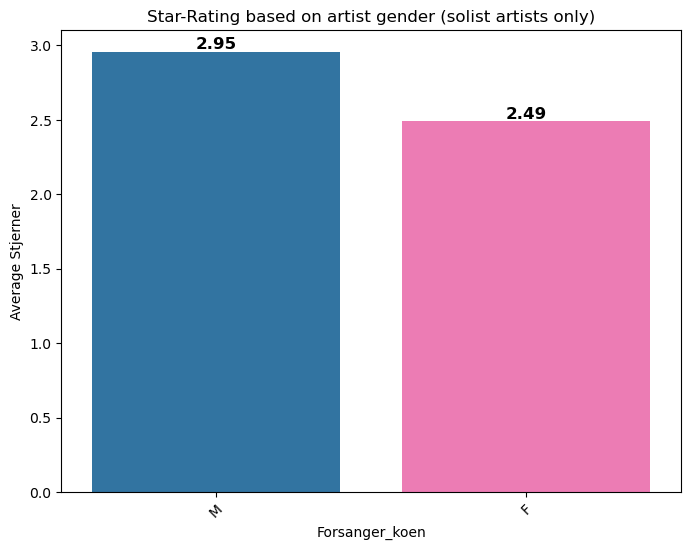

In [9]:
# Plot average value of the column "Stjerner" grouped on "Forsanger_koen" for Solist
plt.figure(figsize=(8, 6))
custom_palette = ["#1f77b4", "#FF69B4"]
ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)
plt.xlabel('Forsanger_koen')
plt.ylabel('Average Stjerner')
plt.title('Star-Rating based on artist gender (solist artists only)')
plt.xticks(rotation=45)

# Add mean values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black', weight='bold')

plt.show()


In [10]:
# Perform a two-sample t-test
t_test_result = stats.ttest_ind(df_filtered_solist[df_filtered_solist['Forsanger_koen'] == 'M']['Stjerner'],
                                 df_filtered_solist[df_filtered_solist['Forsanger_koen'] == 'F']['Stjerner'])

# Print the t-test result
print("T-Test Result:")
print(f"t-statistic: {t_test_result.statistic}")
print(f"p-value: {t_test_result.pvalue}")

T-Test Result:
t-statistic: 2.2298842499367235
p-value: 0.027767442923619868


## Sentiment Analysis

In [11]:
!pip install sentida
import sentida
from sentida import Sentida
!pip install spacy
# import spacy

In [12]:
# print colnames
#print(df_filtered_solist.columns)
df_filtered['Brødtekst'] = df_filtered['Brødtekst'].astype(str)
print(type(df_filtered['Brødtekst']))

<class 'pandas.core.series.Series'>


/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/775208826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Brødtekst'] = df_filtered['Brødtekst'].astype(str)


In [13]:
# sentiment score in loop
sent_scores = []

for text in df_filtered['Brødtekst']:
    sentiment_score = Sentida().sentida(text,output = "total")
    sent_scores.append(sentiment_score)

In [14]:
# append sent_cores to df as new col called 'sentiment_score'
df_filtered['sentiment_score'] = sent_scores

/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/2449116588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_score'] = sent_scores


/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_31077/1642666844.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_31077/1642666844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)


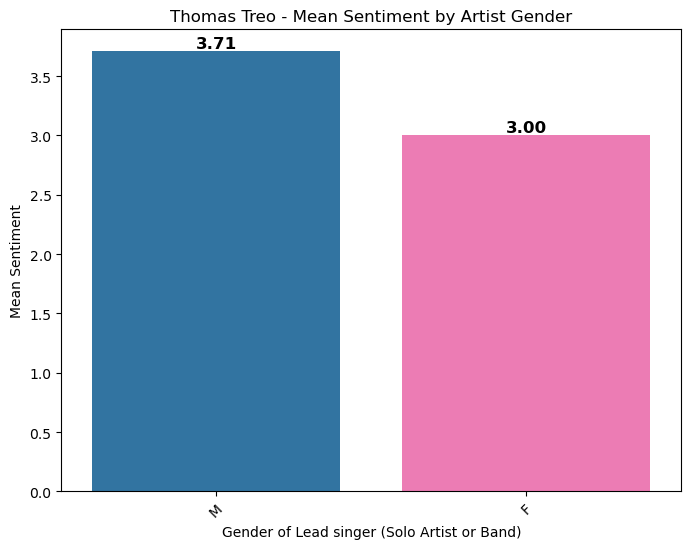

In [20]:
# Plot average value of the column "sentiment_score" grouped on "Forsanger_koen"
plt.figure(figsize=(8, 6))
custom_palette = ["#1f77b4", "#FF69B4"]
ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
plt.xlabel('Gender of Lead singer (Solo Artist or Band)')
plt.ylabel('Mean Sentiment')
plt.title('Thomas Treo - Mean Sentiment by Artist Gender')
plt.xticks(rotation=45)

# Add mean values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black', weight='bold')

plt.show()

/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/4100426010.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/4100426010.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)


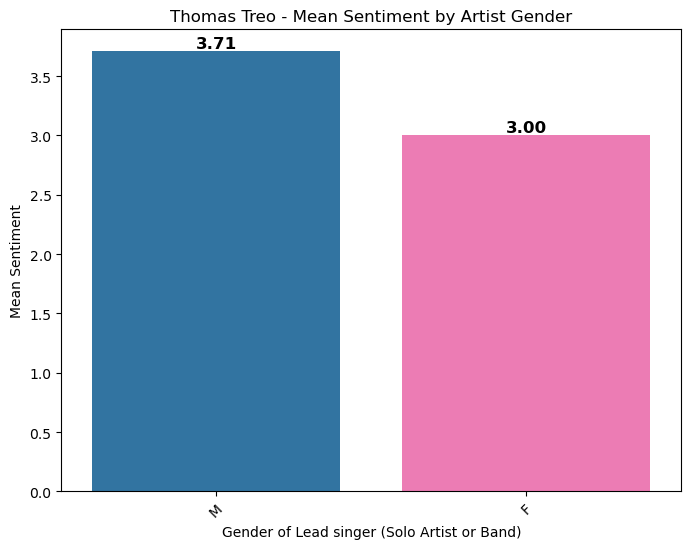

/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/4100426010.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)
/var/folders/98/18p7fygn5473lcp5yfrz9s340000gn/T/ipykernel_36801/4100426010.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)


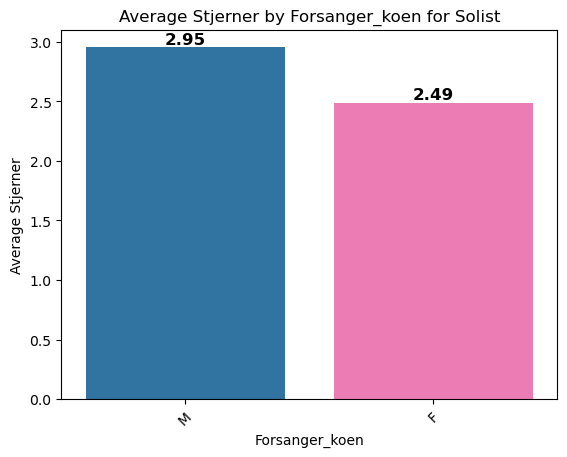

In [15]:
# Filter the DataFrame to include only rows where 'Solist' == 1
df_filtered_solist = df[df['Solist'] == 1]

# Plot average value of the column "sentiment_score" grouped on "Forsanger_koen"
plt.figure(figsize=(8, 6))
custom_palette = ["#1f77b4", "#FF69B4"]
ax = sns.barplot(x='Forsanger_koen', y='sentiment_score', data=df_filtered, estimator='mean', ci=None, palette=custom_palette)
plt.xlabel('Gender of Lead singer (Solo Artist or Band)')
plt.ylabel('Mean Sentiment')
plt.title('Thomas Treo - Mean Sentiment by Artist Gender')
plt.xticks(rotation=45)

# Add mean values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black', weight='bold')

plt.show()
ax = sns.barplot(x='Forsanger_koen', y='Stjerner', data=df_filtered_solist, estimator='mean', ci=None, palette=custom_palette)
plt.xlabel('Forsanger_koen')
plt.ylabel('Average Stjerner')
plt.title('Average Stjerner by Forsanger_koen for Solist')
plt.xticks(rotation=45)

# Add mean values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, color='black', weight='bold')

plt.show()